In [1]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')
# g= sns.pairplot(df,hue='species')
# g.fig.set_size_inches(12,12)

import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))
import numpy as np
import tensorflow.keras as tfk
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


from tensorflow.keras.layers import Dense, Activation, Dropout, Input, InputLayer
from tensorflow.keras.optimizers import SGD

# GPUs:  1
CPU times: total: 4.91 s
Wall time: 10.2 s


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import load_wine
data = load_wine()
# data, target, target_names, 

In [4]:
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
df = pd.DataFrame(data['data'],columns = data['feature_names'])
y = data['target']
y = pd.DataFrame(y,columns=['class'])
df = pd.concat([df,y],axis=1)
display(df.shape)
df.head(1)

(178, 14)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


In [6]:
target = 'class'
y = df[target]
X = df.loc[:, df.columns != target]
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
list(df.columns[df.columns != 'class'])

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# <font color = 'lime'> $\dagger$ EDA per quantitivative features $\dagger$</font>

<AxesSubplot:>

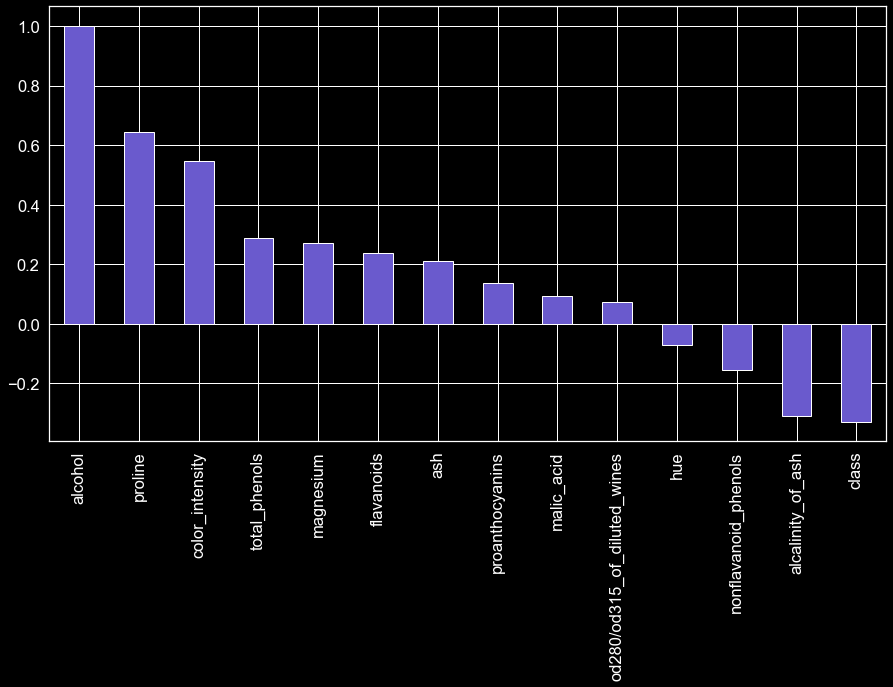

In [8]:
df.corr()['alcohol'].sort_values(ascending=False).plot(kind='bar',color = 'slateblue')

CPU times: total: 172 ms
Wall time: 171 ms


<AxesSubplot:>

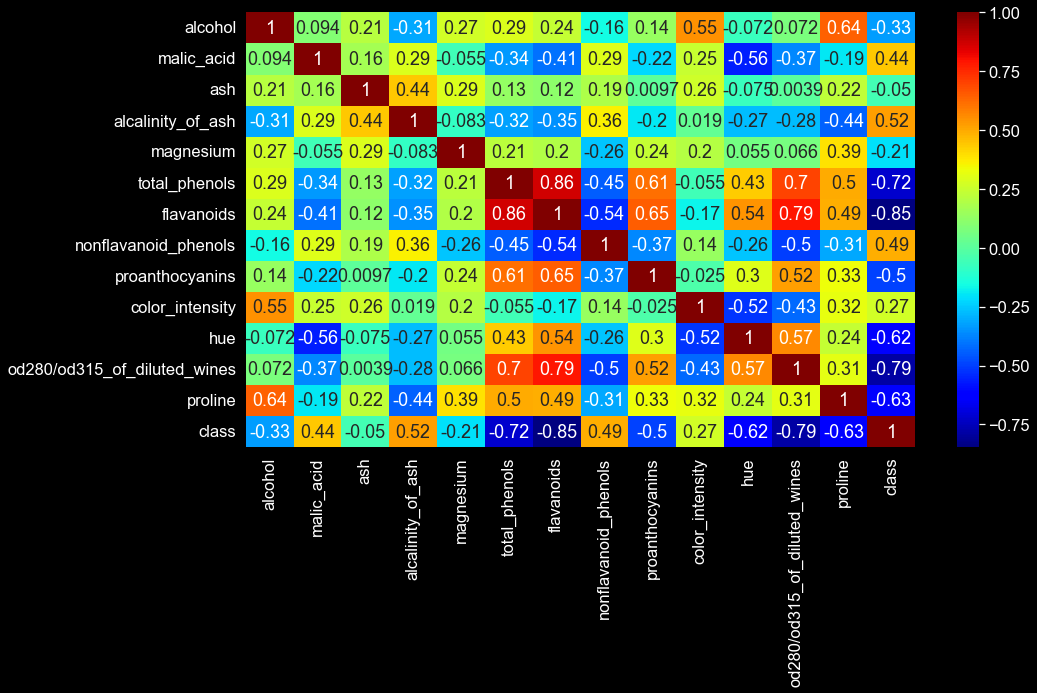

In [9]:
%%time
sns.heatmap(df.corr(),annot=True,cmap='jet')

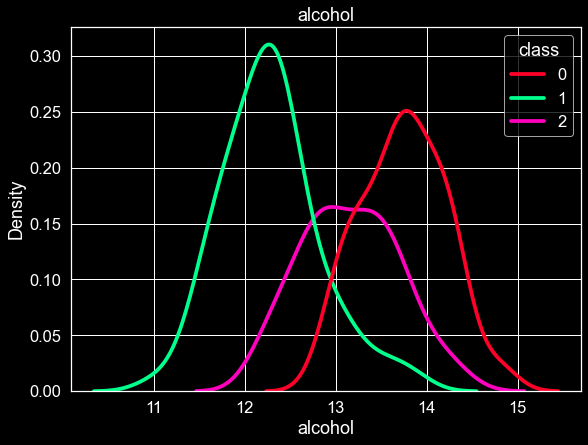

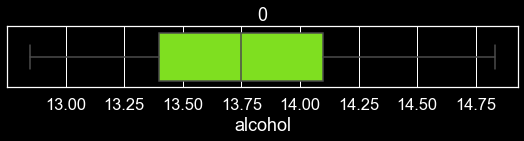

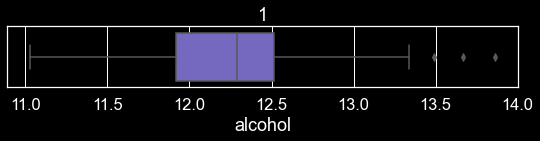

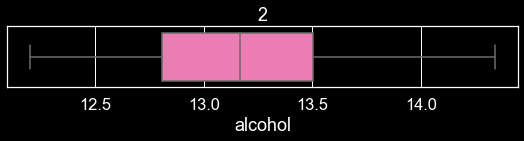

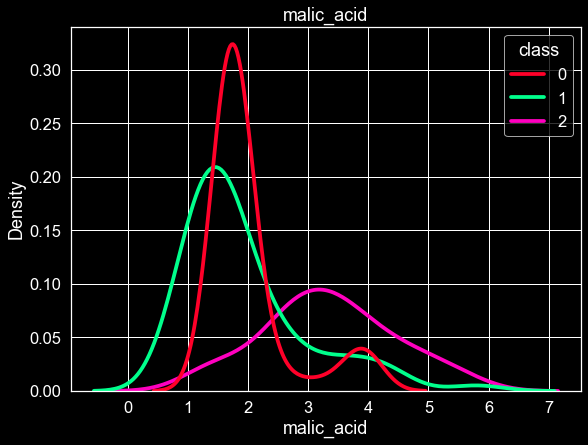

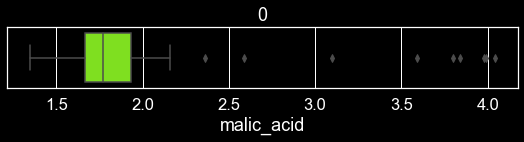

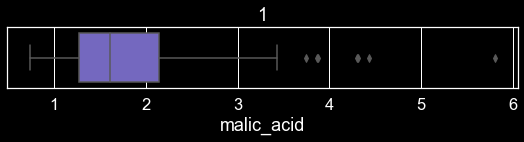

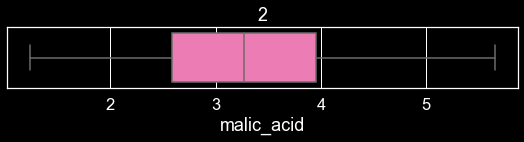

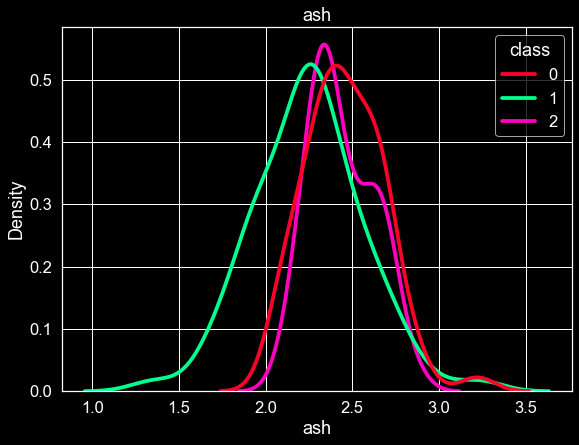

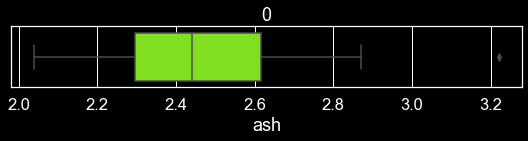

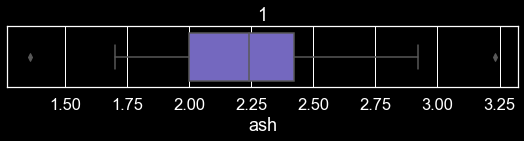

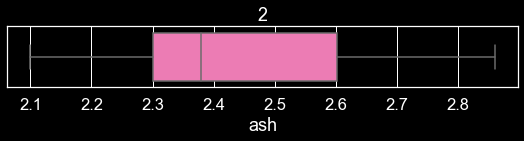

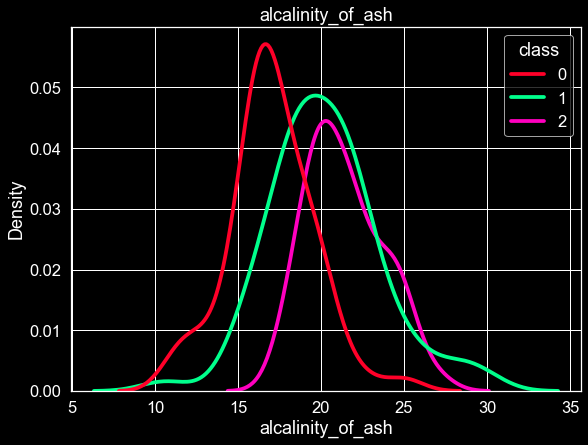

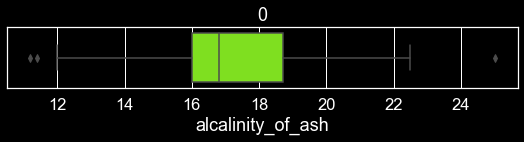

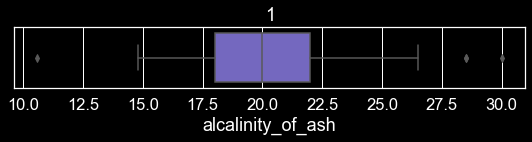

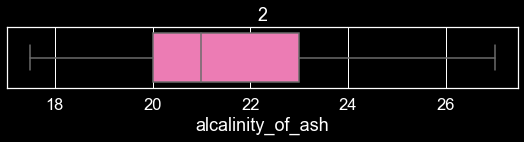

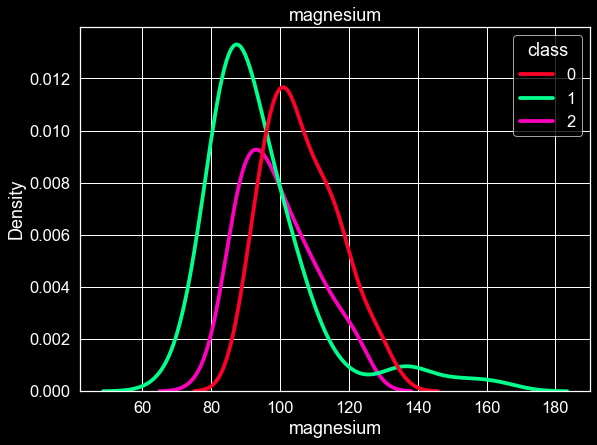

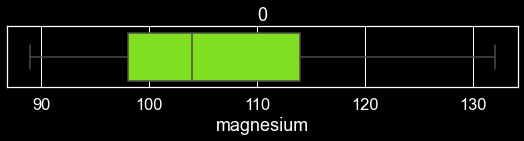

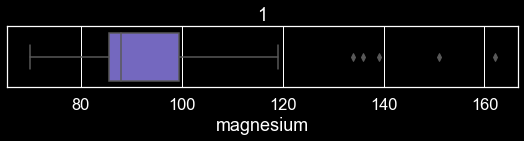

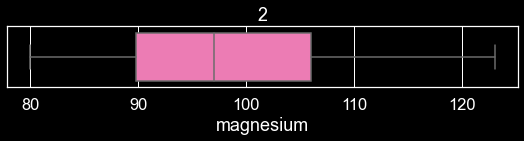

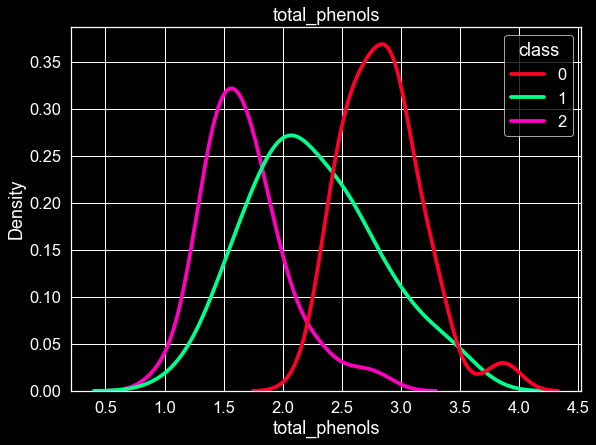

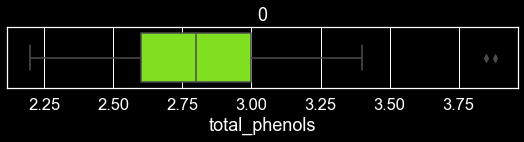

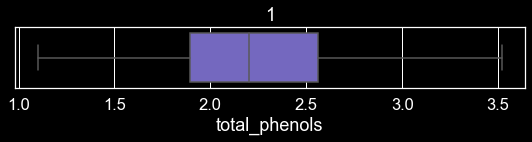

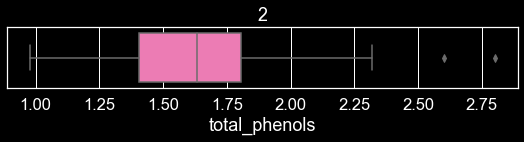

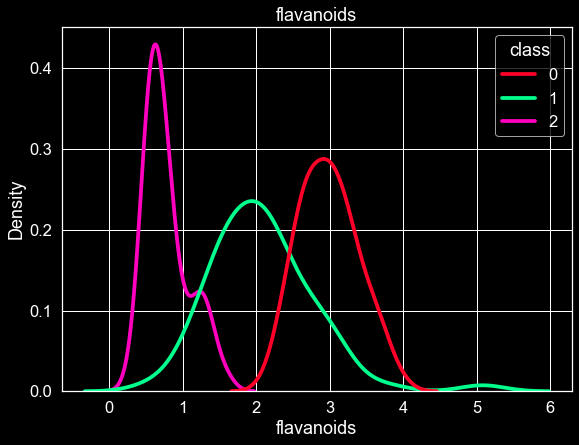

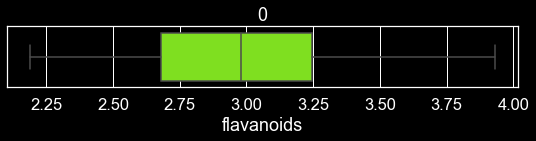

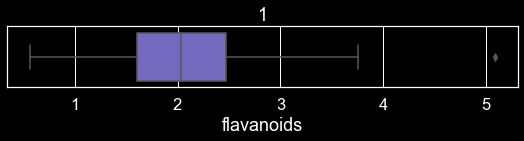

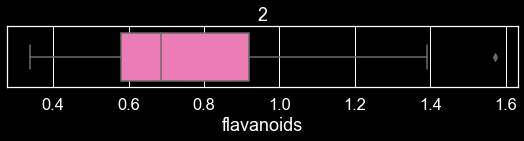

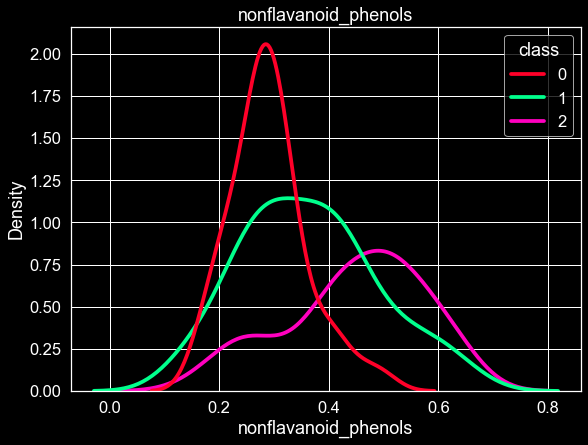

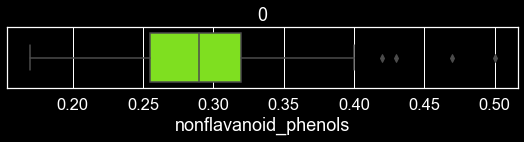

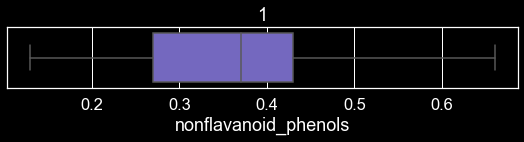

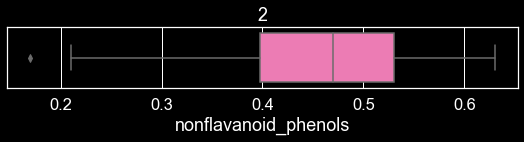

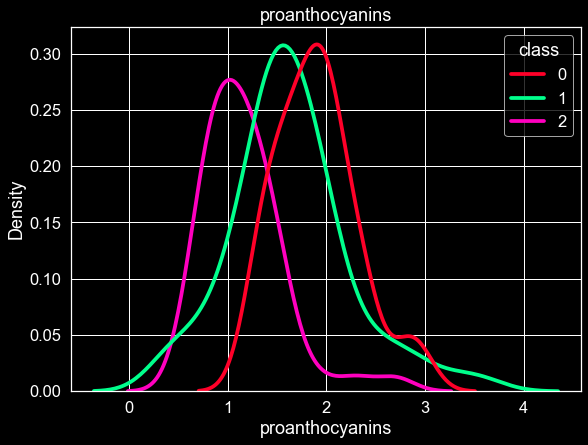

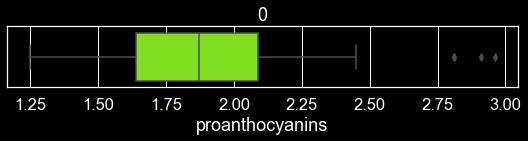

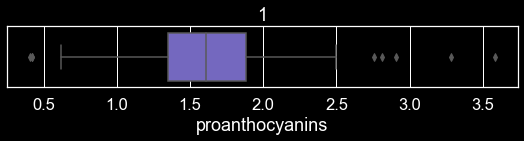

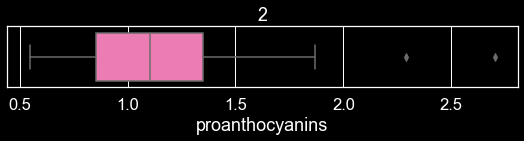

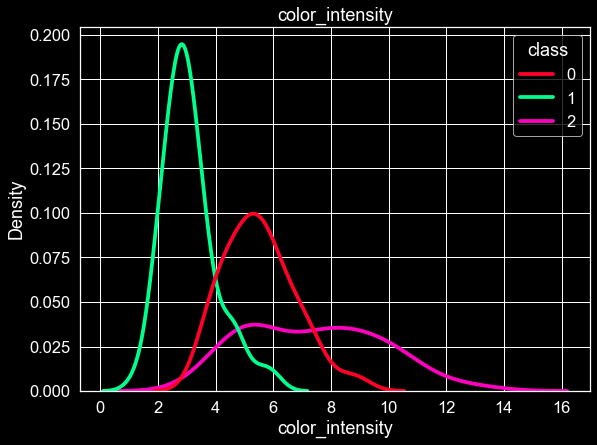

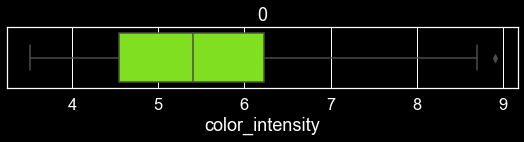

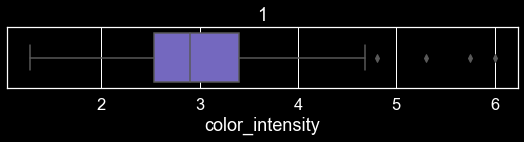

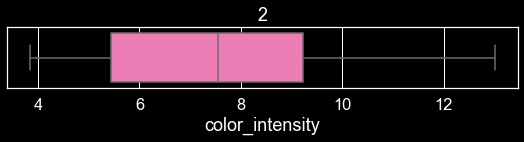

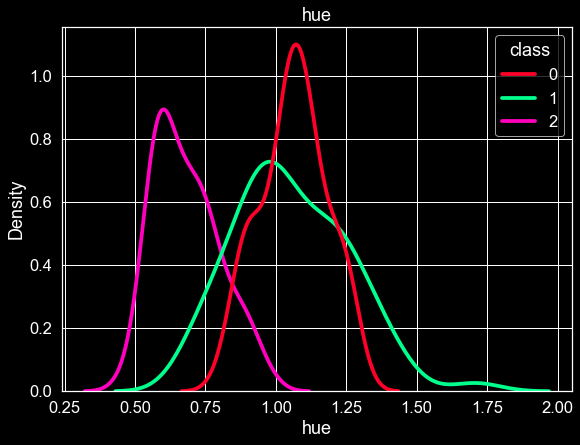

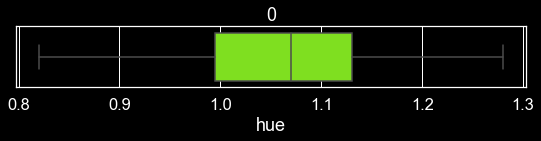

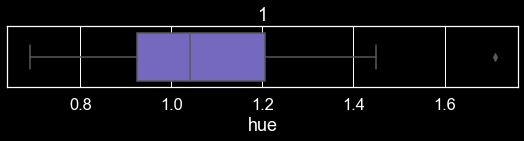

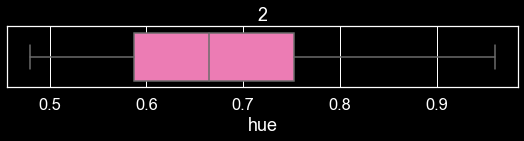

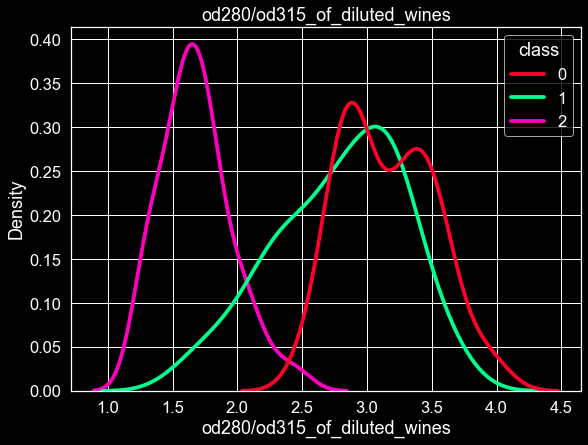

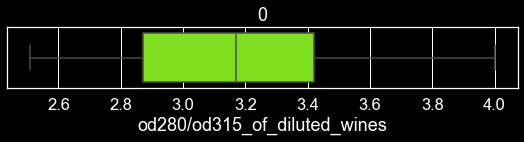

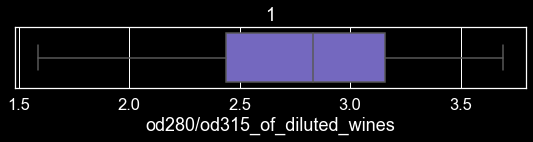

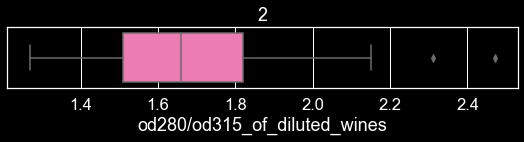

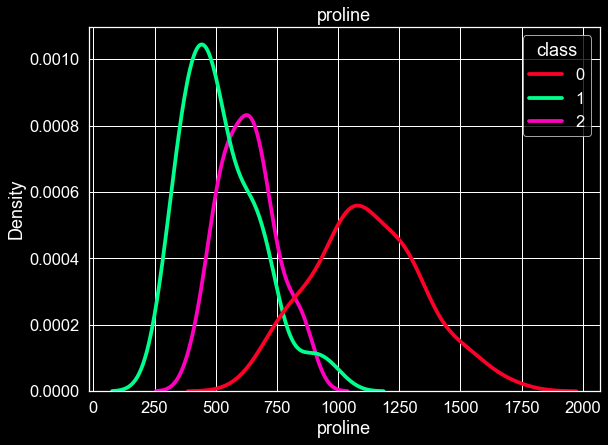

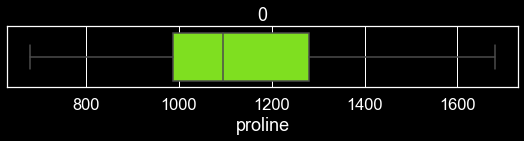

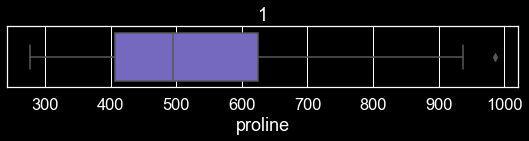

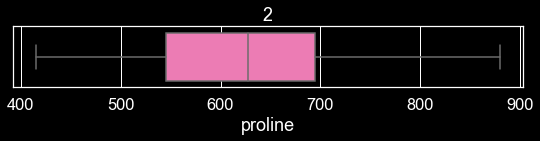

CPU times: total: 11.5 s
Wall time: 12.1 s


In [10]:
%%time
kde_cols=list(df.columns[df.columns != 'class'])
kde_cols
for col in kde_cols:
    # print(col)
    plt.figure(figsize=(9.15,6.7))
    sns.kdeplot(df[f'{col}'], hue = df['class'], palette='gist_rainbow',linewidth=3.77)
    plt.title(f"{col}")
    plt.show();

    for cat,color in zip(df['class'].unique(),['chartreuse','slateblue','hotpink']):
        plt.figure(figsize=(9.15,1.12))
        sns.boxplot(x=df[df['class'] == cat][col],color=f'{color}')
        plt.title(cat)
        plt.show();

# <font color = 'lime'> Pipelines</font>

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [14]:
pipe1 = Pipeline([
    ('stdscale',StandardScaler()),
    ('logit',LogisticRegression())    
])

pipe2 = Pipeline([
    ('minmax',MinMaxScaler()),
    ('logit',LogisticRegression())    
])

In [15]:
pipe3 = Pipeline([
    ('stdscale',StandardScaler()),
    ('logit',RandomForestClassifier())    
])

pipe4 = Pipeline([
    ('minmax',MinMaxScaler()),
    ('logit',RandomForestClassifier())    
])

In [16]:
%%time
cv1 = cross_val_score(pipe1, X,y,cv=5)
print(cv1.mean())

0.9831746031746033
CPU times: total: 78.1 ms
Wall time: 55.9 ms


In [17]:
cv2 = cross_val_score(pipe2, X,y,cv=5)
print(cv2.mean())

0.9776190476190475


In [18]:
cv3 = cross_val_score(pipe3, X,y,cv=5)
print(cv3.mean())

0.9777777777777779


In [19]:
cv4 = cross_val_score(pipe4, X,y,cv=5)
print(cv4.mean())

0.9607936507936508


# <font color = 'lime'> Neural Network</font>

In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
nn_scaler = StandardScaler()
nn_scaler2 = StandardScaler()

In [22]:
X_train_std = nn_scaler.fit_transform(X_train)
X_test_std = nn_scaler2.fit_transform(X_test)

# <font color = 'lime'> Neural Network</font>

## <font color = 'slateblue'> Scale NN Data</font>

In [23]:
X_train.shape[1]

13

In [24]:
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow.keras as tfk

In [25]:
%%time
model = Sequential()

#input
model.add(Dense(13,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))


#output
# mode
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_std,y_train,epochs=50,validation_data=(X_test_std,y_test),verbose=1,batch_size=2)

Epoch 1/50
60/60 [==============================] - 2s 7ms/step - loss: 1.0971 - accuracy: 0.3025 - val_loss: 1.0909 - val_accuracy: 0.4915
Epoch 2/50
60/60 [==============================] - 0s 5ms/step - loss: 1.0773 - accuracy: 0.4454 - val_loss: 1.0539 - val_accuracy: 0.5424
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.9603 - accuracy: 0.5798 - val_loss: 0.8371 - val_accuracy: 0.5932
Epoch 4/50
60/60 [==============================] - 0s 4ms/step - loss: 0.7265 - accuracy: 0.6134 - val_loss: 0.6560 - val_accuracy: 0.5932
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.5927 - accuracy: 0.6134 - val_loss: 0.5826 - val_accuracy: 0.6102
Epoch 6/50
60/60 [==============================] - 0s 5ms/step - loss: 0.5095 - accuracy: 0.6807 - val_loss: 0.4795 - val_accuracy: 0.6271
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.6555 - val_loss: 0.4179 - val_accuracy: 0.6949
Epoch 8/50
60/60 [==

In [26]:
hist = pd.DataFrame(history.history)
hist.sample(2)

,loss,accuracy,val_loss,val_accuracy
22,0.003041,1.0,0.058235,0.966102
14,0.052647,1.0,0.117130,0.966102


In [27]:
%%time
model.evaluate(X_test_std,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9831
CPU times: total: 78.1 ms
Wall time: 51.9 ms


[0.05399862304329872, 0.9830508232116699]

In [28]:
# PRE-SCALE: loss: 0.0924 - accuracy: 0.9661
# 

<AxesSubplot:>

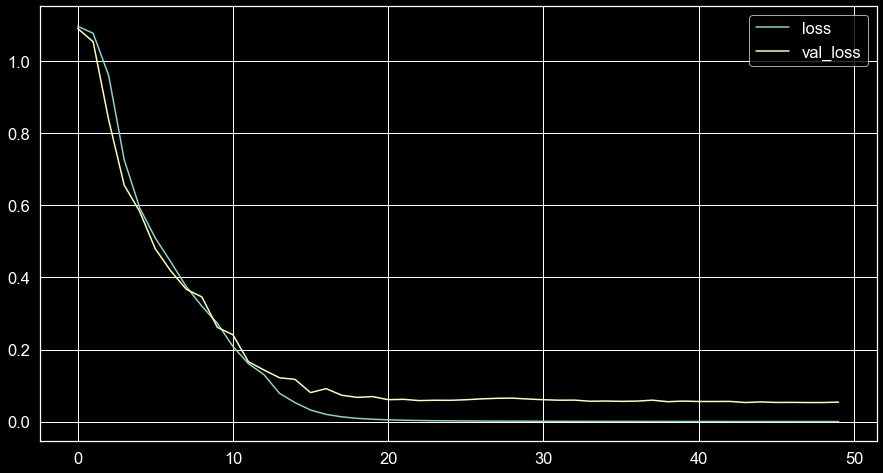

In [29]:
hist[['loss','val_loss']].plot()

<AxesSubplot:>

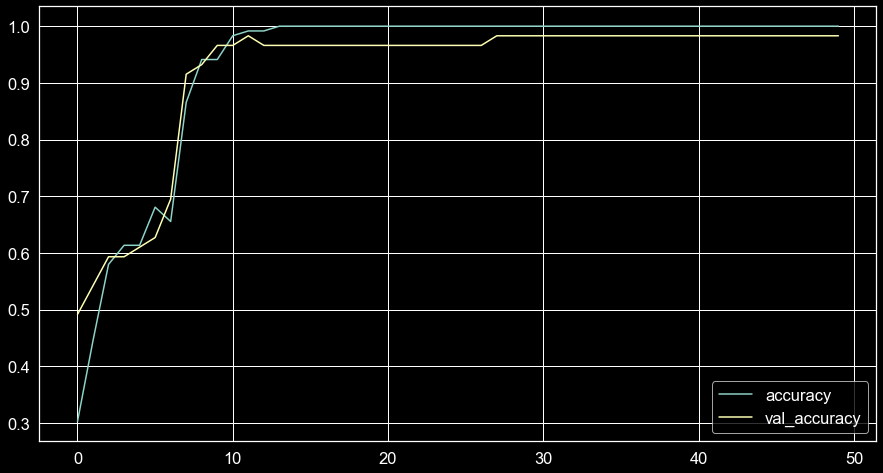

In [30]:
hist[['accuracy','val_accuracy']].plot()

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 10)                140       
                                                                 
 dense_4 (Dense)             (None, 9)                 99        
                                                                 
 dense_5 (Dense)             (None, 8)                 80        
                                                                 
 dense_6 (Dense)             (None, 3)                 2

In [32]:
nn_pred_results = pd.DataFrame(model.predict(X_test_std)).idxmax(axis=1)

In [33]:
print(classification_report(nn_pred_results,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



# <font color = 'hotpink'> KERAS WRAPPER `custom fx`</font>

# `from keras.wrappers.scikit_learn import KerasClassifier`

In [34]:
import os
os.cpu_count()

12

In [35]:
from keras.wrappers.scikit_learn import KerasClassifier

In [36]:
learning_rate = [0.001,0.01,0.1] #alpha
momentum = [0.3,0.7,0.9] #momentum/eta * retained gradient

# "Coefficient of Momentum" which is the percentage of the gradient retained every iteration.

In [37]:
# %%time
# model = Sequential()

# #input
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(8,activation='relu'))
# model.add(Dense(3,activation='softmax'))


# #output
# # mode
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# history = model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),verbose=0,batch_size=2^5)

## EXAMPLE

In [38]:
# def keras_classifier_wrapper():
#     clf = Sequential()
#     clf.add(Dense(32, input_dim=20000, activation='relu'))
#     clf.add(Dense(2, activation='softmax'))
#     clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
#     return clf
# from sklearn.feature_selection import SelectKBest
# select_best_features = SelectKBest(k=20000)

# PL = Pipeline(steps=[('feature_engineer', FE),
#                      ('select_k_best', select_best_features),
#                      ('keras_clf', clf)])

In [39]:
# pipe5 = Pipeline([
#     ('stdscale',StandardScaler()),
#     ('nn',model()) 
# ])

# pipe6 = Pipeline([
#     ('minmax',MinMaxScaler()),
#     ('nn2',model())    
# ])